In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

raw_data = pd.read_excel('titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
#df.describe()

In [4]:
tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(1)
    elif each == 'male':
        tmp.append(0)
    else:
        tmp.append(np.nan)

raw_data['sex'] = tmp

raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')

raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   float64
 1   survived   1045 non-null   float64
 2   name       1045 non-null   object 
 3   sex        1045 non-null   float64
 4   age        1045 non-null   float64
 5   sibsp      1045 non-null   float64
 6   parch      1045 non-null   float64
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
dtypes: float64(8), object(6)
memory usage: 122.5+ KB


In [5]:
# 형 변환
x_data = raw_data.values[:, [0,3,4,5,6,8]].astype(float)
y_data = raw_data.values[:, [1]].astype(float)

#자료나눔
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    stratify=y_data,
                                                    test_size=0.1)#, random_state=7)

# 분류 작업 할때는 stratify=y_data 설정을 꼭 해줘야 한다.
# 안그러면 결과값에 영향을 주기 때문에
# random_state에 대한 의견은 많고 42번이 자주 사용된다.

# 데이터 집계
def Count(obj):
    
    ObjUniqueCount=np.unique(obj, return_counts=True)
    print(ObjUniqueCount[1][0]/sum(ObjUniqueCount[1]),ObjUniqueCount[1][1]/sum(ObjUniqueCount[1]))

Count(y_train)
Count(y_test)


0.5914893617021276 0.4085106382978723
0.5904761904761905 0.4095238095238095


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
np.random.seed(7)

print('tensorflow version : ', tf.__version__)
print('keras version : ', keras.__version__)

tensorflow version :  2.9.1
keras version :  2.9.0


In [57]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', name='layer2',input_shape=(6,)),
#     layers.Dropout(0.5),
    layers.Dense(32, activation='relu', name='layer3'),
#     layers.Dropout(0.5),
    layers.Dense(16, activation='relu', name='layer4'),
#     layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid',name='output')
])

optimizer = tf.keras.optimizers.Adam(0.0005)
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer2 (Dense)              (None, 64)                448       
                                                                 
 layer3 (Dense)              (None, 32)                2080      
                                                                 
 layer4 (Dense)              (None, 16)                528       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


In [58]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size = 5)

Epoch 1/100
188/188 [==============================] - 0s 1ms/step - loss: 0.2278 - accuracy: 0.6521 - val_loss: 0.1957 - val_accuracy: 0.6952
Epoch 2/100
188/188 [==============================] - 0s 697us/step - loss: 0.2197 - accuracy: 0.6660 - val_loss: 0.1930 - val_accuracy: 0.7238
Epoch 3/100
188/188 [==============================] - 0s 712us/step - loss: 0.2095 - accuracy: 0.6851 - val_loss: 0.2421 - val_accuracy: 0.6095
Epoch 4/100
188/188 [==============================] - 0s 705us/step - loss: 0.2085 - accuracy: 0.6755 - val_loss: 0.1860 - val_accuracy: 0.7429
Epoch 5/100
188/188 [==============================] - 0s 699us/step - loss: 0.1984 - accuracy: 0.7138 - val_loss: 0.1768 - val_accuracy: 0.7238
Epoch 6/100
188/188 [==============================] - 0s 688us/step - loss: 0.1841 - accuracy: 0.7404 - val_loss: 0.1750 - val_accuracy: 0.7429
Epoch 7/100
188/188 [==============================] - 0s 699us/step - loss: 0.1792 - accuracy: 0.7500 - val_loss: 0.1682 - val_accu

188/188 [==============================] - 0s 676us/step - loss: 0.1394 - accuracy: 0.8202 - val_loss: 0.1651 - val_accuracy: 0.7619
Epoch 58/100
188/188 [==============================] - 0s 693us/step - loss: 0.1321 - accuracy: 0.8255 - val_loss: 0.1687 - val_accuracy: 0.7905
Epoch 59/100
188/188 [==============================] - 0s 675us/step - loss: 0.1346 - accuracy: 0.8096 - val_loss: 0.1662 - val_accuracy: 0.7714
Epoch 60/100
188/188 [==============================] - 0s 665us/step - loss: 0.1327 - accuracy: 0.8085 - val_loss: 0.1685 - val_accuracy: 0.7619
Epoch 61/100
188/188 [==============================] - 0s 673us/step - loss: 0.1321 - accuracy: 0.8170 - val_loss: 0.1837 - val_accuracy: 0.7429
Epoch 62/100
188/188 [==============================] - 0s 673us/step - loss: 0.1382 - accuracy: 0.8138 - val_loss: 0.1749 - val_accuracy: 0.7524
Epoch 63/100
188/188 [==============================] - 0s 681us/step - loss: 0.1360 - accuracy: 0.8149 - val_loss: 0.1656 - val_accuracy

In [59]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.1698 - accuracy: 0.7714


[0.169791579246521, 0.7714285850524902]

In [64]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', name='layer2',input_shape=(6,)),
     layers.Dropout(0.5),
    layers.Dense(32, activation='relu', name='layer3'),
     layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid',name='output')
])

adam = tf.keras.optimizers.Adam(0.0005)

model.compile(loss='mse', # loss='binary_crossentropy'
             optimizer = adam,
             metrics=['accuracy'])

model.summary()



Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer2 (Dense)              (None, 64)                448       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 layer3 (Dense)              (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [65]:
EPOCH = 100
history = model.fit(X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=EPOCH)

Epoch 1/100
30/30 [==============================] - 0s 3ms/step - loss: 0.4404 - accuracy: 0.5160 - val_loss: 0.3976 - val_accuracy: 0.5905
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 0.5553 - val_loss: 0.4022 - val_accuracy: 0.5905
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3932 - accuracy: 0.5713 - val_loss: 0.4027 - val_accuracy: 0.5905
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3944 - accuracy: 0.5723 - val_loss: 0.4005 - val_accuracy: 0.5905
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3760 - accuracy: 0.5947 - val_loss: 0.3989 - val_accuracy: 0.5905
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3996 - accuracy: 0.5574 - val_loss: 0.3986 - val_accuracy: 0.5905
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.5894 - val_loss: 0.3978 - val_accuracy: 0.5905
Epoch 8/100
3

Epoch 59/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2282 - accuracy: 0.6862 - val_loss: 0.2219 - val_accuracy: 0.6762
Epoch 60/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2278 - accuracy: 0.6521 - val_loss: 0.2233 - val_accuracy: 0.6667
Epoch 61/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2306 - accuracy: 0.6660 - val_loss: 0.2232 - val_accuracy: 0.6762
Epoch 62/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2353 - accuracy: 0.6617 - val_loss: 0.2236 - val_accuracy: 0.6762
Epoch 63/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2308 - accuracy: 0.6500 - val_loss: 0.2226 - val_accuracy: 0.6762
Epoch 64/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2190 - accuracy: 0.6809 - val_loss: 0.2203 - val_accuracy: 0.6762
Epoch 65/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2279 - accuracy: 0.6638 - val_loss: 0.2218 - val_accuracy: 0.6762
Epoch 

In [66]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1000us/step - loss: 0.1889 - accuracy: 0.7333


[0.1889229416847229, 0.7333333492279053]

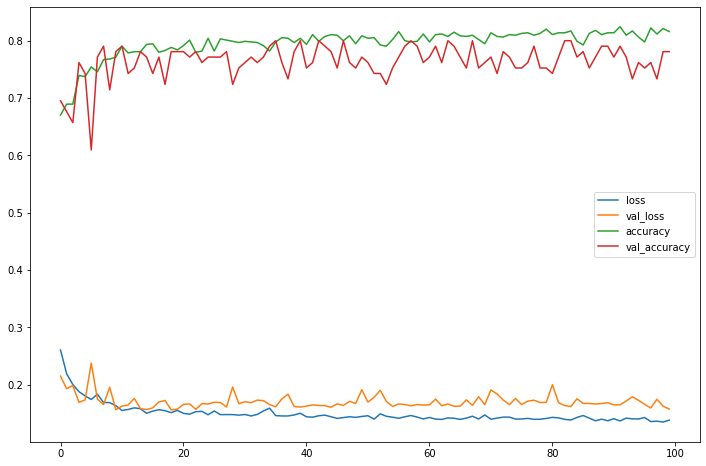

In [22]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.show()

In [33]:
##base line model

#optimizer
optimizer = tf.keras.optimizers.RMSprop(0.001)

### base
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(14, activation='relu', input_shape=(6,)),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
baseline_model.compile(loss='mse', 
              optimizer=optimizer, 
              metrics=['accuracy', 'mse'])

### smaller
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(6,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
smaller_model.compile(loss='mse', 
              optimizer=optimizer, 
              metrics=['accuracy', 'mse'])

### bigger
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(6,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
bigger_model.compile(loss='mse', 
              optimizer=optimizer, 
              metrics=['accuracy', 'mse'])


# ### base
# baseline_model2 = keras.Sequential([
#     # `.summary` 메서드 때문에 `input_shape`가 필요합니다
#     keras.layers.Dense(16, activation='relu', input_shape=(6,)),
#     keras.layers.Dense(16, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])
# baseline_model2.compile(loss='mse', 
#               optimizer=optimizer2, 
#               metrics=['accuracy', 'mse'])

# ### smaller
# smaller_model2 = keras.Sequential([
#     keras.layers.Dense(4, activation='relu', input_shape=(6,)),
#     keras.layers.Dense(4, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])
# smaller_model2.compile(loss='mse', 
#               optimizer=optimizer2, 
#               metrics=['accuracy', 'mse'])

# ### bigger
# bigger_model2 = keras.models.Sequential([
#     keras.layers.Dense(512, activation='relu', input_shape=(6,)),
#     keras.layers.Dense(512, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])
# bigger_model2.compile(loss='mse', 
#               optimizer=optimizer2, 
#               metrics=['accuracy', 'mse'])




In [34]:
ep = 100

baseline_history = baseline_model.fit(X_train,
                                      y_train,
                                      epochs=ep,
                                      batch_size=5,
                                      validation_split=0.2,
                                      verbose=2)

smaller_history = smaller_model.fit(X_train,
                                      y_train,
                                      epochs=ep,
                                      batch_size=5,
                                      validation_split=0.2,
                                      verbose=2)

bigger_history = bigger_model.fit(X_train,
                                      y_train,
                                      epochs=ep,
                                      batch_size=5,
                                      validation_split=0.2,
                                      verbose=2)

Epoch 1/100
151/151 - 0s - loss: 0.2282 - accuracy: 0.6396 - mse: 0.2282 - val_loss: 0.2019 - val_accuracy: 0.7500 - val_mse: 0.2019 - 474ms/epoch - 3ms/step
Epoch 2/100
151/151 - 0s - loss: 0.2165 - accuracy: 0.6622 - mse: 0.2165 - val_loss: 0.2022 - val_accuracy: 0.7234 - val_mse: 0.2022 - 115ms/epoch - 760us/step
Epoch 3/100
151/151 - 0s - loss: 0.2131 - accuracy: 0.6822 - mse: 0.2131 - val_loss: 0.1936 - val_accuracy: 0.7660 - val_mse: 0.1936 - 99ms/epoch - 654us/step
Epoch 4/100
151/151 - 0s - loss: 0.2094 - accuracy: 0.6862 - mse: 0.2094 - val_loss: 0.1807 - val_accuracy: 0.7553 - val_mse: 0.1807 - 103ms/epoch - 684us/step
Epoch 5/100
151/151 - 0s - loss: 0.2018 - accuracy: 0.7114 - mse: 0.2018 - val_loss: 0.2140 - val_accuracy: 0.6436 - val_mse: 0.2140 - 104ms/epoch - 686us/step
Epoch 6/100
151/151 - 0s - loss: 0.1944 - accuracy: 0.7207 - mse: 0.1944 - val_loss: 0.1649 - val_accuracy: 0.8298 - val_mse: 0.1649 - 99ms/epoch - 658us/step
Epoch 7/100
151/151 - 0s - loss: 0.1880 - ac

Epoch 53/100
151/151 - 0s - loss: 0.1483 - accuracy: 0.7872 - mse: 0.1483 - val_loss: 0.1254 - val_accuracy: 0.8191 - val_mse: 0.1254 - 98ms/epoch - 650us/step
Epoch 54/100
151/151 - 0s - loss: 0.1493 - accuracy: 0.7939 - mse: 0.1493 - val_loss: 0.1312 - val_accuracy: 0.8245 - val_mse: 0.1312 - 96ms/epoch - 639us/step
Epoch 55/100
151/151 - 0s - loss: 0.1485 - accuracy: 0.7926 - mse: 0.1485 - val_loss: 0.1324 - val_accuracy: 0.8191 - val_mse: 0.1324 - 96ms/epoch - 638us/step
Epoch 56/100
151/151 - 0s - loss: 0.1486 - accuracy: 0.7939 - mse: 0.1486 - val_loss: 0.1271 - val_accuracy: 0.8298 - val_mse: 0.1271 - 98ms/epoch - 649us/step
Epoch 57/100
151/151 - 0s - loss: 0.1463 - accuracy: 0.7832 - mse: 0.1463 - val_loss: 0.1269 - val_accuracy: 0.8298 - val_mse: 0.1269 - 99ms/epoch - 656us/step
Epoch 58/100
151/151 - 0s - loss: 0.1476 - accuracy: 0.7886 - mse: 0.1476 - val_loss: 0.1289 - val_accuracy: 0.8351 - val_mse: 0.1289 - 96ms/epoch - 633us/step
Epoch 59/100
151/151 - 0s - loss: 0.1470

Epoch 5/100
151/151 - 0s - loss: 0.2386 - accuracy: 0.6303 - mse: 0.2386 - val_loss: 0.2269 - val_accuracy: 0.6755 - val_mse: 0.2269 - 100ms/epoch - 660us/step
Epoch 6/100
151/151 - 0s - loss: 0.2374 - accuracy: 0.6383 - mse: 0.2374 - val_loss: 0.2261 - val_accuracy: 0.6649 - val_mse: 0.2261 - 96ms/epoch - 636us/step
Epoch 7/100
151/151 - 0s - loss: 0.2359 - accuracy: 0.6303 - mse: 0.2359 - val_loss: 0.2246 - val_accuracy: 0.6649 - val_mse: 0.2246 - 96ms/epoch - 637us/step
Epoch 8/100
151/151 - 0s - loss: 0.2350 - accuracy: 0.6356 - mse: 0.2350 - val_loss: 0.2233 - val_accuracy: 0.6755 - val_mse: 0.2233 - 96ms/epoch - 634us/step
Epoch 9/100
151/151 - 0s - loss: 0.2344 - accuracy: 0.6356 - mse: 0.2344 - val_loss: 0.2209 - val_accuracy: 0.6755 - val_mse: 0.2209 - 96ms/epoch - 637us/step
Epoch 10/100
151/151 - 0s - loss: 0.2341 - accuracy: 0.6356 - mse: 0.2341 - val_loss: 0.2214 - val_accuracy: 0.6755 - val_mse: 0.2214 - 104ms/epoch - 689us/step
Epoch 11/100
151/151 - 0s - loss: 0.2333 - 

Epoch 57/100
151/151 - 0s - loss: 0.2105 - accuracy: 0.6755 - mse: 0.2105 - val_loss: 0.1883 - val_accuracy: 0.7500 - val_mse: 0.1883 - 92ms/epoch - 610us/step
Epoch 58/100
151/151 - 0s - loss: 0.2098 - accuracy: 0.6782 - mse: 0.2098 - val_loss: 0.1858 - val_accuracy: 0.7447 - val_mse: 0.1858 - 98ms/epoch - 647us/step
Epoch 59/100
151/151 - 0s - loss: 0.2092 - accuracy: 0.6742 - mse: 0.2092 - val_loss: 0.1851 - val_accuracy: 0.7500 - val_mse: 0.1851 - 89ms/epoch - 589us/step
Epoch 60/100
151/151 - 0s - loss: 0.2081 - accuracy: 0.6822 - mse: 0.2081 - val_loss: 0.1840 - val_accuracy: 0.7553 - val_mse: 0.1840 - 93ms/epoch - 616us/step
Epoch 61/100
151/151 - 0s - loss: 0.2068 - accuracy: 0.6848 - mse: 0.2068 - val_loss: 0.1822 - val_accuracy: 0.7447 - val_mse: 0.1822 - 93ms/epoch - 616us/step
Epoch 62/100
151/151 - 0s - loss: 0.2059 - accuracy: 0.6888 - mse: 0.2059 - val_loss: 0.1819 - val_accuracy: 0.7500 - val_mse: 0.1819 - 96ms/epoch - 634us/step
Epoch 63/100
151/151 - 0s - loss: 0.2046

Epoch 9/100
151/151 - 0s - loss: 0.2007 - accuracy: 0.7247 - mse: 0.2007 - val_loss: 0.1938 - val_accuracy: 0.7500 - val_mse: 0.1938 - 373ms/epoch - 2ms/step
Epoch 10/100
151/151 - 0s - loss: 0.1860 - accuracy: 0.7394 - mse: 0.1860 - val_loss: 0.1973 - val_accuracy: 0.7394 - val_mse: 0.1973 - 349ms/epoch - 2ms/step
Epoch 11/100
151/151 - 0s - loss: 0.1876 - accuracy: 0.7620 - mse: 0.1876 - val_loss: 0.1433 - val_accuracy: 0.8085 - val_mse: 0.1433 - 345ms/epoch - 2ms/step
Epoch 12/100
151/151 - 0s - loss: 0.1818 - accuracy: 0.7606 - mse: 0.1818 - val_loss: 0.1448 - val_accuracy: 0.8191 - val_mse: 0.1448 - 349ms/epoch - 2ms/step
Epoch 13/100
151/151 - 0s - loss: 0.1795 - accuracy: 0.7460 - mse: 0.1795 - val_loss: 0.1423 - val_accuracy: 0.8351 - val_mse: 0.1423 - 344ms/epoch - 2ms/step
Epoch 14/100
151/151 - 0s - loss: 0.1781 - accuracy: 0.7460 - mse: 0.1781 - val_loss: 0.1550 - val_accuracy: 0.8245 - val_mse: 0.1550 - 343ms/epoch - 2ms/step
Epoch 15/100
151/151 - 0s - loss: 0.1857 - accu

Epoch 61/100
151/151 - 0s - loss: 0.1420 - accuracy: 0.8165 - mse: 0.1420 - val_loss: 0.1304 - val_accuracy: 0.8351 - val_mse: 0.1304 - 351ms/epoch - 2ms/step
Epoch 62/100
151/151 - 0s - loss: 0.1407 - accuracy: 0.8205 - mse: 0.1407 - val_loss: 0.1347 - val_accuracy: 0.8351 - val_mse: 0.1347 - 363ms/epoch - 2ms/step
Epoch 63/100
151/151 - 0s - loss: 0.1489 - accuracy: 0.8045 - mse: 0.1489 - val_loss: 0.1312 - val_accuracy: 0.8404 - val_mse: 0.1312 - 348ms/epoch - 2ms/step
Epoch 64/100
151/151 - 0s - loss: 0.1459 - accuracy: 0.8098 - mse: 0.1459 - val_loss: 0.1304 - val_accuracy: 0.8511 - val_mse: 0.1304 - 377ms/epoch - 2ms/step
Epoch 65/100
151/151 - 0s - loss: 0.1435 - accuracy: 0.8138 - mse: 0.1435 - val_loss: 0.1265 - val_accuracy: 0.8457 - val_mse: 0.1265 - 356ms/epoch - 2ms/step
Epoch 66/100
151/151 - 0s - loss: 0.1423 - accuracy: 0.8152 - mse: 0.1423 - val_loss: 0.1325 - val_accuracy: 0.8404 - val_mse: 0.1325 - 365ms/epoch - 2ms/step
Epoch 67/100
151/151 - 0s - loss: 0.1419 - acc

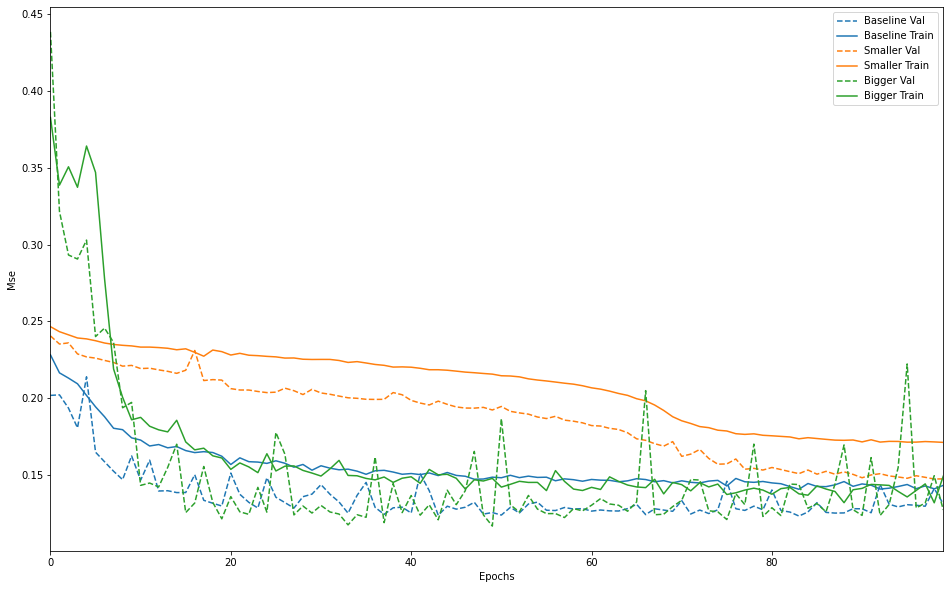

In [35]:
def plot_history(histories, key='mse'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [36]:
### base
baseline_model1 = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(14, activation='relu', input_shape=(6,)),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
baseline_model1.compile(loss='mse', 
              optimizer='Adam', 
              metrics=['accuracy', 'mse'])

### smaller
smaller_model1 = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(6,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
smaller_model1.compile(loss='mse', 
              optimizer='Adam', 
              metrics=['accuracy', 'mse'])

### bigger
bigger_model1 = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(6,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
bigger_model1.compile(loss='mse', 
              optimizer='Adam', 
              metrics=['accuracy', 'mse'])

In [37]:
ep = 100

baseline1_history = baseline_model1.fit(X_train,
                                      y_train,
                                      epochs=ep,
                                      batch_size=5,
                                      validation_split=0.2,
                                      verbose=2)

smaller1_history = smaller_model1.fit(X_train,
                                      y_train,
                                      epochs=ep,
                                      batch_size=5,
                                      validation_split=0.2,
                                      verbose=2)

bigger1_history = bigger_model1.fit(X_train,
                                      y_train,
                                      epochs=ep,
                                      batch_size=5,
                                      validation_split=0.2,
                                      verbose=2)

Epoch 1/100
151/151 - 0s - loss: 0.2701 - accuracy: 0.5997 - mse: 0.2701 - val_loss: 0.2161 - val_accuracy: 0.6915 - val_mse: 0.2161 - 391ms/epoch - 3ms/step
Epoch 2/100
151/151 - 0s - loss: 0.2280 - accuracy: 0.6476 - mse: 0.2280 - val_loss: 0.1973 - val_accuracy: 0.6915 - val_mse: 0.1973 - 102ms/epoch - 675us/step
Epoch 3/100
151/151 - 0s - loss: 0.2216 - accuracy: 0.6622 - mse: 0.2216 - val_loss: 0.1917 - val_accuracy: 0.7394 - val_mse: 0.1917 - 106ms/epoch - 704us/step
Epoch 4/100
151/151 - 0s - loss: 0.2153 - accuracy: 0.6596 - mse: 0.2153 - val_loss: 0.1884 - val_accuracy: 0.7340 - val_mse: 0.1884 - 106ms/epoch - 701us/step
Epoch 5/100
151/151 - 0s - loss: 0.2077 - accuracy: 0.6862 - mse: 0.2077 - val_loss: 0.1873 - val_accuracy: 0.7128 - val_mse: 0.1873 - 100ms/epoch - 662us/step
Epoch 6/100
151/151 - 0s - loss: 0.2106 - accuracy: 0.6795 - mse: 0.2106 - val_loss: 0.1759 - val_accuracy: 0.7660 - val_mse: 0.1759 - 103ms/epoch - 680us/step
Epoch 7/100
151/151 - 0s - loss: 0.1990 - 

151/151 - 0s - loss: 0.1426 - accuracy: 0.8019 - mse: 0.1426 - val_loss: 0.1386 - val_accuracy: 0.8351 - val_mse: 0.1386 - 101ms/epoch - 672us/step
Epoch 53/100
151/151 - 0s - loss: 0.1419 - accuracy: 0.7979 - mse: 0.1419 - val_loss: 0.1296 - val_accuracy: 0.8457 - val_mse: 0.1296 - 103ms/epoch - 682us/step
Epoch 54/100
151/151 - 0s - loss: 0.1428 - accuracy: 0.7912 - mse: 0.1428 - val_loss: 0.1580 - val_accuracy: 0.7979 - val_mse: 0.1580 - 101ms/epoch - 670us/step
Epoch 55/100
151/151 - 0s - loss: 0.1430 - accuracy: 0.7979 - mse: 0.1430 - val_loss: 0.1299 - val_accuracy: 0.8245 - val_mse: 0.1299 - 96ms/epoch - 636us/step
Epoch 56/100
151/151 - 0s - loss: 0.1394 - accuracy: 0.8085 - mse: 0.1394 - val_loss: 0.1390 - val_accuracy: 0.8404 - val_mse: 0.1390 - 97ms/epoch - 643us/step
Epoch 57/100
151/151 - 0s - loss: 0.1437 - accuracy: 0.7979 - mse: 0.1437 - val_loss: 0.1302 - val_accuracy: 0.8404 - val_mse: 0.1302 - 97ms/epoch - 644us/step
Epoch 58/100
151/151 - 0s - loss: 0.1451 - accurac

151/151 - 0s - loss: 0.2320 - accuracy: 0.6463 - mse: 0.2320 - val_loss: 0.2023 - val_accuracy: 0.7181 - val_mse: 0.2023 - 141ms/epoch - 935us/step
Epoch 4/100
151/151 - 0s - loss: 0.2272 - accuracy: 0.6476 - mse: 0.2272 - val_loss: 0.2054 - val_accuracy: 0.7234 - val_mse: 0.2054 - 128ms/epoch - 850us/step
Epoch 5/100
151/151 - 0s - loss: 0.2236 - accuracy: 0.6463 - mse: 0.2236 - val_loss: 0.2016 - val_accuracy: 0.7181 - val_mse: 0.2016 - 103ms/epoch - 682us/step
Epoch 6/100
151/151 - 0s - loss: 0.2259 - accuracy: 0.6423 - mse: 0.2259 - val_loss: 0.2025 - val_accuracy: 0.7234 - val_mse: 0.2025 - 103ms/epoch - 682us/step
Epoch 7/100
151/151 - 0s - loss: 0.2209 - accuracy: 0.6476 - mse: 0.2209 - val_loss: 0.2031 - val_accuracy: 0.7340 - val_mse: 0.2031 - 105ms/epoch - 697us/step
Epoch 8/100
151/151 - 0s - loss: 0.2204 - accuracy: 0.6410 - mse: 0.2204 - val_loss: 0.2021 - val_accuracy: 0.7234 - val_mse: 0.2021 - 101ms/epoch - 669us/step
Epoch 9/100
151/151 - 0s - loss: 0.2213 - accuracy: 

151/151 - 0s - loss: 0.1511 - accuracy: 0.7846 - mse: 0.1511 - val_loss: 0.1310 - val_accuracy: 0.8298 - val_mse: 0.1310 - 102ms/epoch - 676us/step
Epoch 55/100
151/151 - 0s - loss: 0.1504 - accuracy: 0.7872 - mse: 0.1504 - val_loss: 0.1331 - val_accuracy: 0.8404 - val_mse: 0.1331 - 101ms/epoch - 669us/step
Epoch 56/100
151/151 - 0s - loss: 0.1521 - accuracy: 0.7846 - mse: 0.1521 - val_loss: 0.1300 - val_accuracy: 0.8351 - val_mse: 0.1300 - 99ms/epoch - 659us/step
Epoch 57/100
151/151 - 0s - loss: 0.1499 - accuracy: 0.7806 - mse: 0.1499 - val_loss: 0.1383 - val_accuracy: 0.8298 - val_mse: 0.1383 - 109ms/epoch - 724us/step
Epoch 58/100
151/151 - 0s - loss: 0.1496 - accuracy: 0.7912 - mse: 0.1496 - val_loss: 0.1320 - val_accuracy: 0.8298 - val_mse: 0.1320 - 111ms/epoch - 735us/step
Epoch 59/100
151/151 - 0s - loss: 0.1492 - accuracy: 0.7872 - mse: 0.1492 - val_loss: 0.1305 - val_accuracy: 0.8298 - val_mse: 0.1305 - 131ms/epoch - 865us/step
Epoch 60/100
151/151 - 0s - loss: 0.1516 - accur

151/151 - 0s - loss: 0.5878 - accuracy: 0.4122 - mse: 0.5878 - val_loss: 0.6064 - val_accuracy: 0.3936 - val_mse: 0.6064 - 206ms/epoch - 1ms/step
Epoch 6/100
151/151 - 0s - loss: 0.5878 - accuracy: 0.4122 - mse: 0.5878 - val_loss: 0.6064 - val_accuracy: 0.3936 - val_mse: 0.6064 - 202ms/epoch - 1ms/step
Epoch 7/100
151/151 - 0s - loss: 0.5878 - accuracy: 0.4122 - mse: 0.5878 - val_loss: 0.6064 - val_accuracy: 0.3936 - val_mse: 0.6064 - 199ms/epoch - 1ms/step
Epoch 8/100
151/151 - 0s - loss: 0.5878 - accuracy: 0.4122 - mse: 0.5878 - val_loss: 0.6064 - val_accuracy: 0.3936 - val_mse: 0.6064 - 208ms/epoch - 1ms/step
Epoch 9/100
151/151 - 0s - loss: 0.5878 - accuracy: 0.4122 - mse: 0.5878 - val_loss: 0.6064 - val_accuracy: 0.3936 - val_mse: 0.6064 - 203ms/epoch - 1ms/step
Epoch 10/100
151/151 - 0s - loss: 0.5878 - accuracy: 0.4122 - mse: 0.5878 - val_loss: 0.6064 - val_accuracy: 0.3936 - val_mse: 0.6064 - 205ms/epoch - 1ms/step
Epoch 11/100
151/151 - 0s - loss: 0.5878 - accuracy: 0.4122 - m

Epoch 57/100
151/151 - 0s - loss: 0.5878 - accuracy: 0.4122 - mse: 0.5878 - val_loss: 0.6064 - val_accuracy: 0.3936 - val_mse: 0.6064 - 181ms/epoch - 1ms/step
Epoch 58/100
151/151 - 0s - loss: 0.5878 - accuracy: 0.4122 - mse: 0.5878 - val_loss: 0.6064 - val_accuracy: 0.3936 - val_mse: 0.6064 - 175ms/epoch - 1ms/step
Epoch 59/100
151/151 - 0s - loss: 0.5878 - accuracy: 0.4122 - mse: 0.5878 - val_loss: 0.6064 - val_accuracy: 0.3936 - val_mse: 0.6064 - 181ms/epoch - 1ms/step
Epoch 60/100
151/151 - 0s - loss: 0.5878 - accuracy: 0.4122 - mse: 0.5878 - val_loss: 0.6064 - val_accuracy: 0.3936 - val_mse: 0.6064 - 194ms/epoch - 1ms/step
Epoch 61/100
151/151 - 0s - loss: 0.5878 - accuracy: 0.4122 - mse: 0.5878 - val_loss: 0.6064 - val_accuracy: 0.3936 - val_mse: 0.6064 - 193ms/epoch - 1ms/step
Epoch 62/100
151/151 - 0s - loss: 0.5878 - accuracy: 0.4122 - mse: 0.5878 - val_loss: 0.6064 - val_accuracy: 0.3936 - val_mse: 0.6064 - 184ms/epoch - 1ms/step
Epoch 63/100
151/151 - 0s - loss: 0.5878 - acc

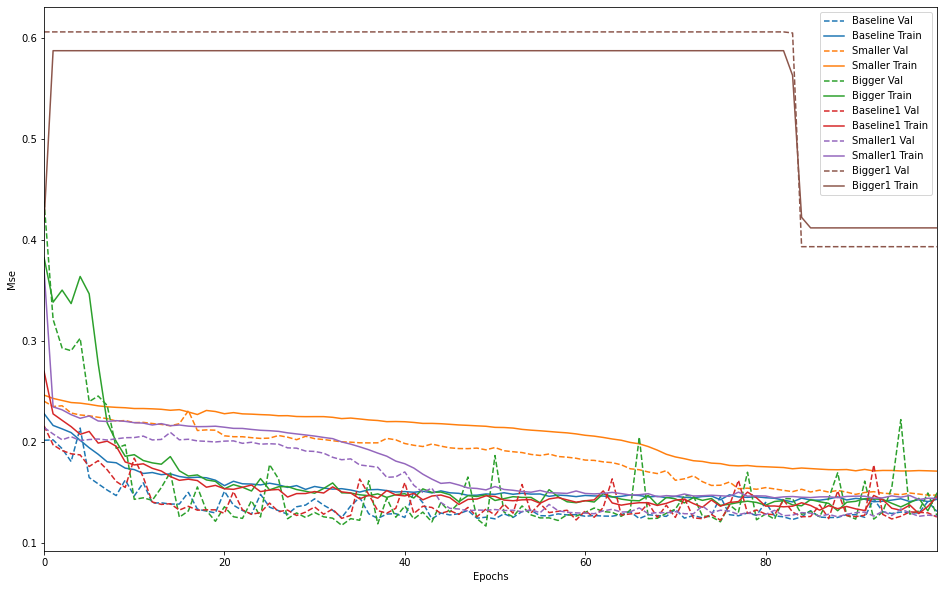

In [38]:
def plot_history(histories, key='mse'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history),
              ('baseline1', baseline1_history),
              ('smaller1', smaller1_history),
              ('bigger1', bigger1_history)])

## 규제를 넣어서 타이타닉 생존 확률 구하기

In [41]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(14, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(6,)),
    keras.layers.Dense(14, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense((1),activation='sigmoid')
])



l2_model.compile(optimizer=optimizer,
                 loss='mse',
                 metrics=['accuracy', 'mse'])

ep = 100
l2_model_history = l2_model.fit(X_train,
                                      y_train,
                                      epochs=ep,
                                      batch_size=5,
                                      validation_split=0.2,
                                      verbose=2)

Epoch 1/100
151/151 - 0s - loss: 0.2853 - accuracy: 0.6396 - mse: 0.2668 - val_loss: 0.2657 - val_accuracy: 0.6489 - val_mse: 0.2507 - 430ms/epoch - 3ms/step
Epoch 2/100
151/151 - 0s - loss: 0.2531 - accuracy: 0.6356 - mse: 0.2399 - val_loss: 0.2375 - val_accuracy: 0.6755 - val_mse: 0.2258 - 103ms/epoch - 682us/step
Epoch 3/100
151/151 - 0s - loss: 0.2411 - accuracy: 0.6356 - mse: 0.2299 - val_loss: 0.2057 - val_accuracy: 0.7181 - val_mse: 0.1949 - 100ms/epoch - 662us/step
Epoch 4/100
151/151 - 0s - loss: 0.2306 - accuracy: 0.6662 - mse: 0.2200 - val_loss: 0.2172 - val_accuracy: 0.6915 - val_mse: 0.2068 - 105ms/epoch - 697us/step
Epoch 5/100
151/151 - 0s - loss: 0.2247 - accuracy: 0.6649 - mse: 0.2144 - val_loss: 0.2044 - val_accuracy: 0.7128 - val_mse: 0.1942 - 106ms/epoch - 703us/step
Epoch 6/100
151/151 - 0s - loss: 0.2253 - accuracy: 0.6755 - mse: 0.2151 - val_loss: 0.1987 - val_accuracy: 0.7553 - val_mse: 0.1884 - 117ms/epoch - 773us/step
Epoch 7/100
151/151 - 0s - loss: 0.2277 - 

Epoch 52/100
151/151 - 0s - loss: 0.1793 - accuracy: 0.7726 - mse: 0.1645 - val_loss: 0.2017 - val_accuracy: 0.7553 - val_mse: 0.1871 - 101ms/epoch - 670us/step
Epoch 53/100
151/151 - 0s - loss: 0.1816 - accuracy: 0.7593 - mse: 0.1670 - val_loss: 0.1455 - val_accuracy: 0.8404 - val_mse: 0.1309 - 128ms/epoch - 845us/step
Epoch 54/100
151/151 - 0s - loss: 0.1790 - accuracy: 0.7726 - mse: 0.1645 - val_loss: 0.1492 - val_accuracy: 0.8085 - val_mse: 0.1347 - 103ms/epoch - 685us/step
Epoch 55/100
151/151 - 0s - loss: 0.1777 - accuracy: 0.7633 - mse: 0.1633 - val_loss: 0.1488 - val_accuracy: 0.8404 - val_mse: 0.1344 - 113ms/epoch - 751us/step
Epoch 56/100
151/151 - 0s - loss: 0.1810 - accuracy: 0.7646 - mse: 0.1666 - val_loss: 0.1626 - val_accuracy: 0.7819 - val_mse: 0.1482 - 107ms/epoch - 710us/step
Epoch 57/100
151/151 - 0s - loss: 0.1779 - accuracy: 0.7620 - mse: 0.1636 - val_loss: 0.1503 - val_accuracy: 0.8404 - val_mse: 0.1360 - 109ms/epoch - 719us/step
Epoch 58/100
151/151 - 0s - loss: 

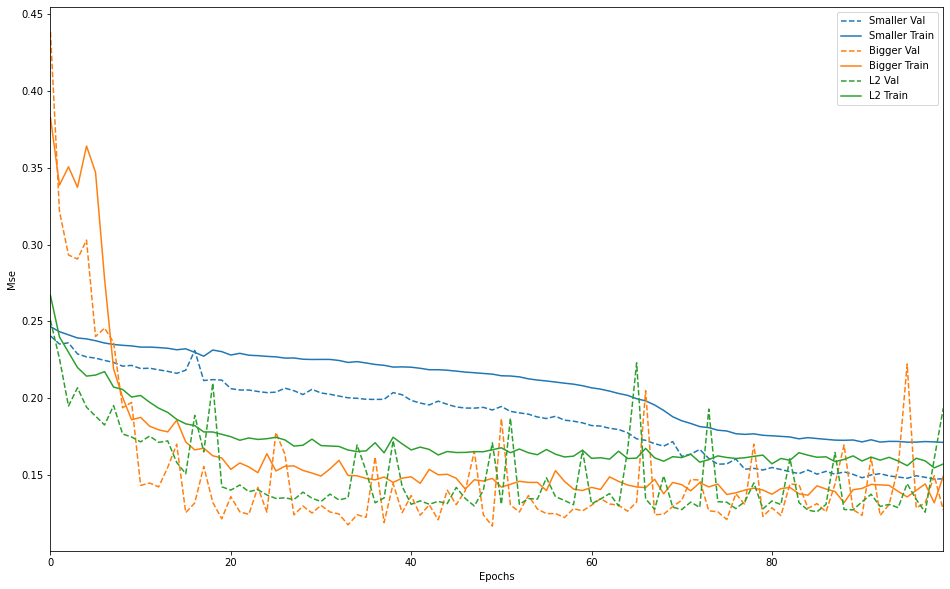

In [42]:
plot_history([('smaller', smaller_history),
              ('bigger', bigger_history),
              ('l2', l2_model_history)])

In [43]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(14, activation='relu', input_shape=(6,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1)
])


dpt_model.compile(optimizer='Adam',
                  loss='mse',
                  metrics=['accuracy','mse'])

dpt_model_history = dpt_model.fit(X_train,
                                      y_train,
                                      epochs=ep,
                                      batch_size=5,
                                      validation_split=0.2,
                                      verbose=2)

Epoch 1/100
151/151 - 0s - loss: 441.0966 - accuracy: 0.5399 - mse: 441.0966 - val_loss: 6.3084 - val_accuracy: 0.6064 - val_mse: 6.3084 - 381ms/epoch - 3ms/step
Epoch 2/100
151/151 - 0s - loss: 234.2630 - accuracy: 0.5332 - mse: 234.2630 - val_loss: 3.3275 - val_accuracy: 0.6064 - val_mse: 3.3275 - 104ms/epoch - 685us/step
Epoch 3/100
151/151 - 0s - loss: 144.8116 - accuracy: 0.5572 - mse: 144.8116 - val_loss: 1.5991 - val_accuracy: 0.6277 - val_mse: 1.5991 - 103ms/epoch - 679us/step
Epoch 4/100
151/151 - 0s - loss: 74.3135 - accuracy: 0.5638 - mse: 74.3135 - val_loss: 0.9735 - val_accuracy: 0.6223 - val_mse: 0.9735 - 99ms/epoch - 659us/step
Epoch 5/100
151/151 - 0s - loss: 64.1500 - accuracy: 0.5691 - mse: 64.1500 - val_loss: 0.5685 - val_accuracy: 0.6489 - val_mse: 0.5685 - 104ms/epoch - 690us/step
Epoch 6/100
151/151 - 0s - loss: 28.0969 - accuracy: 0.5758 - mse: 28.0969 - val_loss: 0.5325 - val_accuracy: 0.6383 - val_mse: 0.5325 - 99ms/epoch - 654us/step
Epoch 7/100
151/151 - 0s -

Epoch 52/100
151/151 - 0s - loss: 0.3567 - accuracy: 0.6090 - mse: 0.3567 - val_loss: 0.2365 - val_accuracy: 0.6064 - val_mse: 0.2365 - 104ms/epoch - 689us/step
Epoch 53/100
151/151 - 0s - loss: 0.4852 - accuracy: 0.6117 - mse: 0.4852 - val_loss: 0.2365 - val_accuracy: 0.6064 - val_mse: 0.2365 - 107ms/epoch - 708us/step
Epoch 54/100
151/151 - 0s - loss: 0.3482 - accuracy: 0.5904 - mse: 0.3482 - val_loss: 0.2353 - val_accuracy: 0.6064 - val_mse: 0.2353 - 106ms/epoch - 701us/step
Epoch 55/100
151/151 - 0s - loss: 0.2801 - accuracy: 0.6051 - mse: 0.2801 - val_loss: 0.2343 - val_accuracy: 0.6064 - val_mse: 0.2343 - 99ms/epoch - 659us/step
Epoch 56/100
151/151 - 0s - loss: 0.2937 - accuracy: 0.6011 - mse: 0.2937 - val_loss: 0.2320 - val_accuracy: 0.6064 - val_mse: 0.2320 - 102ms/epoch - 679us/step
Epoch 57/100
151/151 - 0s - loss: 0.3223 - accuracy: 0.5851 - mse: 0.3223 - val_loss: 0.2343 - val_accuracy: 0.6064 - val_mse: 0.2343 - 106ms/epoch - 699us/step
Epoch 58/100
151/151 - 0s - loss: 0

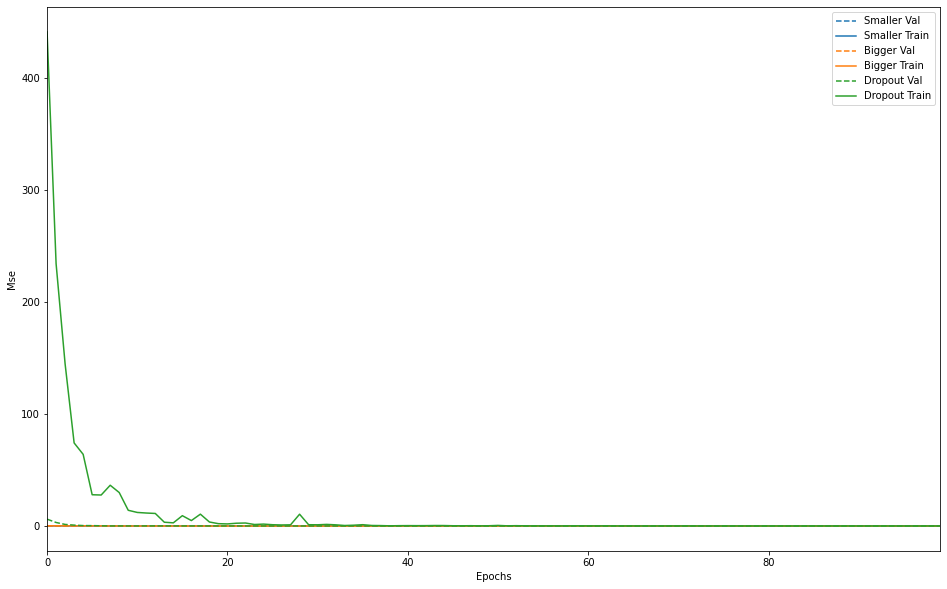

In [44]:
plot_history([('smaller', smaller_history),
              ('bigger', bigger_history),
              ('dropout', dpt_model_history)])

In [45]:
raw_data = pd.read_excel('titanic.xls')
raw_data.info()

tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(1)
    elif each == 'male':
        tmp.append(0)
    else:
        tmp.append(np.nan)

raw_data['sex'] = tmp

raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')

raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]

model = Sequential()
model.add(Dense(255, input_shape=(6,), activation='relu'))
model.add(Dense((1), activation='sigmoid'))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None

In [46]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size = 5)

Epoch 1/100
188/188 [==============================] - 0s 974us/step - loss: 0.2375 - accuracy: 0.6745 - val_loss: 0.1879 - val_accuracy: 0.7238
Epoch 2/100
188/188 [==============================] - 0s 669us/step - loss: 0.1970 - accuracy: 0.7245 - val_loss: 0.2642 - val_accuracy: 0.6476
Epoch 3/100
188/188 [==============================] - 0s 674us/step - loss: 0.1923 - accuracy: 0.7468 - val_loss: 0.2743 - val_accuracy: 0.6571
Epoch 4/100
188/188 [==============================] - 0s 689us/step - loss: 0.1814 - accuracy: 0.7585 - val_loss: 0.1645 - val_accuracy: 0.7619
Epoch 5/100
188/188 [==============================] - 0s 686us/step - loss: 0.1754 - accuracy: 0.7500 - val_loss: 0.1642 - val_accuracy: 0.7810
Epoch 6/100
188/188 [==============================] - 0s 693us/step - loss: 0.1969 - accuracy: 0.7404 - val_loss: 0.2116 - val_accuracy: 0.7524
Epoch 7/100
188/188 [==============================] - 0s 690us/step - loss: 0.1700 - accuracy: 0.7713 - val_loss: 0.1824 - val_ac

188/188 [==============================] - 0s 657us/step - loss: 0.1405 - accuracy: 0.8096 - val_loss: 0.1638 - val_accuracy: 0.7619
Epoch 58/100
188/188 [==============================] - 0s 658us/step - loss: 0.1410 - accuracy: 0.8128 - val_loss: 0.1670 - val_accuracy: 0.7714
Epoch 59/100
188/188 [==============================] - 0s 658us/step - loss: 0.1419 - accuracy: 0.8128 - val_loss: 0.1638 - val_accuracy: 0.7905
Epoch 60/100
188/188 [==============================] - 0s 666us/step - loss: 0.1375 - accuracy: 0.8181 - val_loss: 0.1874 - val_accuracy: 0.7333
Epoch 61/100
188/188 [==============================] - 0s 653us/step - loss: 0.1445 - accuracy: 0.8074 - val_loss: 0.2315 - val_accuracy: 0.7048
Epoch 62/100
188/188 [==============================] - 0s 649us/step - loss: 0.1437 - accuracy: 0.8106 - val_loss: 0.1650 - val_accuracy: 0.7429
Epoch 63/100
188/188 [==============================] - 0s 657us/step - loss: 0.1423 - accuracy: 0.8043 - val_loss: 0.1695 - val_accuracy

In [47]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.2044 - accuracy: 0.7333


[0.2044180929660797, 0.7333333492279053]

In [48]:
baseline_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.1718 - accuracy: 0.7905 - mse: 0.1718


[0.17176657915115356, 0.7904762029647827, 0.17176657915115356]

In [49]:
smaller_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.1696 - accuracy: 0.7619 - mse: 0.1696


[0.16963893175125122, 0.761904776096344, 0.16963893175125122]

In [50]:
baseline_model1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1000us/step - loss: 0.1728 - accuracy: 0.7333 - mse: 0.1728


[0.17284776270389557, 0.7333333492279053, 0.17284776270389557]

In [51]:
smaller_model1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.1638 - accuracy: 0.7619 - mse: 0.1638


[0.16381187736988068, 0.761904776096344, 0.16381187736988068]

In [52]:
dpt_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.2342 - accuracy: 0.6000 - mse: 0.2342


[0.2341596484184265, 0.6000000238418579, 0.2341596484184265]

In [54]:
l2_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.2336 - accuracy: 0.7333 - mse: 0.2202


[0.23361149430274963, 0.7333333492279053, 0.22016741335391998]

In [56]:
baseline_model1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.1728 - accuracy: 0.7333 - mse: 0.1728


[0.17284776270389557, 0.7333333492279053, 0.17284776270389557]

In [75]:
model = keras.Sequential([
    layers.Dense(16, activation='relu', name='layer2',input_shape=(6,)),
    layers.Dense(16, activation='relu', name='layer3'),
    layers.Dense(16, activation='relu', name='layer4'),
    layers.Dense(1, activation='sigmoid',name='output')
])

adam = tf.keras.optimizers.Adam(0.0005)

model.compile(loss='mse', # loss='binary_crossentropy'
             optimizer = adam,
             metrics=['accuracy','mse'])

model.summary()



Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer2 (Dense)              (None, 16)                112       
                                                                 
 layer3 (Dense)              (None, 16)                272       
                                                                 
 layer4 (Dense)              (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [76]:
EPOCH = 500
history = model.fit(X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=EPOCH)

Epoch 1/500
30/30 [==============================] - 0s 3ms/step - loss: 0.2624 - accuracy: 0.5574 - mse: 0.2624 - val_loss: 0.1878 - val_accuracy: 0.7048 - val_mse: 0.1878
Epoch 2/500
30/30 [==============================] - 0s 1ms/step - loss: 0.2228 - accuracy: 0.6617 - mse: 0.2228 - val_loss: 0.1857 - val_accuracy: 0.7429 - val_mse: 0.1857
Epoch 3/500
30/30 [==============================] - 0s 1ms/step - loss: 0.2173 - accuracy: 0.6681 - mse: 0.2173 - val_loss: 0.1823 - val_accuracy: 0.7429 - val_mse: 0.1823
Epoch 4/500
30/30 [==============================] - 0s 1ms/step - loss: 0.2153 - accuracy: 0.6681 - mse: 0.2153 - val_loss: 0.1865 - val_accuracy: 0.7429 - val_mse: 0.1865
Epoch 5/500
30/30 [==============================] - 0s 1ms/step - loss: 0.2123 - accuracy: 0.6745 - mse: 0.2123 - val_loss: 0.1901 - val_accuracy: 0.7524 - val_mse: 0.1901
Epoch 6/500
30/30 [==============================] - 0s 1ms/step - loss: 0.2113 - accuracy: 0.6894 - mse: 0.2113 - val_loss: 0.1936 - v

30/30 [==============================] - 0s 1ms/step - loss: 0.1575 - accuracy: 0.8043 - mse: 0.1575 - val_loss: 0.1587 - val_accuracy: 0.7810 - val_mse: 0.1587
Epoch 49/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1566 - accuracy: 0.8021 - mse: 0.1566 - val_loss: 0.1600 - val_accuracy: 0.7810 - val_mse: 0.1600
Epoch 50/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1550 - accuracy: 0.8074 - mse: 0.1550 - val_loss: 0.1564 - val_accuracy: 0.7905 - val_mse: 0.1564
Epoch 51/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1530 - accuracy: 0.8032 - mse: 0.1530 - val_loss: 0.1575 - val_accuracy: 0.7714 - val_mse: 0.1575
Epoch 52/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1533 - accuracy: 0.7989 - mse: 0.1533 - val_loss: 0.1580 - val_accuracy: 0.8000 - val_mse: 0.1580
Epoch 53/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1545 - accuracy: 0.7989 - mse: 0.1545 - val_loss: 0.1643 - val_accu

30/30 [==============================] - 0s 1ms/step - loss: 0.1413 - accuracy: 0.8117 - mse: 0.1413 - val_loss: 0.1566 - val_accuracy: 0.8000 - val_mse: 0.1566
Epoch 96/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1420 - accuracy: 0.8032 - mse: 0.1420 - val_loss: 0.1589 - val_accuracy: 0.8095 - val_mse: 0.1589
Epoch 97/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1400 - accuracy: 0.8117 - mse: 0.1400 - val_loss: 0.1629 - val_accuracy: 0.7905 - val_mse: 0.1629
Epoch 98/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1389 - accuracy: 0.8096 - mse: 0.1389 - val_loss: 0.1571 - val_accuracy: 0.8190 - val_mse: 0.1571
Epoch 99/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1382 - accuracy: 0.8128 - mse: 0.1382 - val_loss: 0.1573 - val_accuracy: 0.7905 - val_mse: 0.1573
Epoch 100/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1378 - accuracy: 0.8117 - mse: 0.1378 - val_loss: 0.1600 - val_acc

Epoch 142/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1359 - accuracy: 0.8181 - mse: 0.1359 - val_loss: 0.1617 - val_accuracy: 0.8095 - val_mse: 0.1617
Epoch 143/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1373 - accuracy: 0.8117 - mse: 0.1373 - val_loss: 0.1617 - val_accuracy: 0.7810 - val_mse: 0.1617
Epoch 144/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.8255 - mse: 0.1353 - val_loss: 0.1640 - val_accuracy: 0.7619 - val_mse: 0.1640
Epoch 145/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1357 - accuracy: 0.8213 - mse: 0.1357 - val_loss: 0.1686 - val_accuracy: 0.7905 - val_mse: 0.1686
Epoch 146/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1364 - accuracy: 0.8213 - mse: 0.1364 - val_loss: 0.1608 - val_accuracy: 0.8190 - val_mse: 0.1608
Epoch 147/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1350 - accuracy: 0.8181 - mse: 0.1350 - val_loss

Epoch 189/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1339 - accuracy: 0.8202 - mse: 0.1339 - val_loss: 0.1668 - val_accuracy: 0.7714 - val_mse: 0.1668
Epoch 190/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1340 - accuracy: 0.8287 - mse: 0.1340 - val_loss: 0.1871 - val_accuracy: 0.7524 - val_mse: 0.1871
Epoch 191/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1448 - accuracy: 0.8064 - mse: 0.1448 - val_loss: 0.1577 - val_accuracy: 0.8000 - val_mse: 0.1577
Epoch 192/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1384 - accuracy: 0.8160 - mse: 0.1384 - val_loss: 0.1614 - val_accuracy: 0.8190 - val_mse: 0.1614
Epoch 193/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1338 - accuracy: 0.8202 - mse: 0.1338 - val_loss: 0.1687 - val_accuracy: 0.7905 - val_mse: 0.1687
Epoch 194/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1344 - accuracy: 0.8213 - mse: 0.1344 - val_loss

Epoch 236/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1330 - accuracy: 0.8160 - mse: 0.1330 - val_loss: 0.1631 - val_accuracy: 0.7905 - val_mse: 0.1631
Epoch 237/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1318 - accuracy: 0.8319 - mse: 0.1318 - val_loss: 0.1629 - val_accuracy: 0.8095 - val_mse: 0.1629
Epoch 238/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1316 - accuracy: 0.8298 - mse: 0.1316 - val_loss: 0.1607 - val_accuracy: 0.8000 - val_mse: 0.1607
Epoch 239/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1334 - accuracy: 0.8234 - mse: 0.1334 - val_loss: 0.1621 - val_accuracy: 0.8095 - val_mse: 0.1621
Epoch 240/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1320 - accuracy: 0.8234 - mse: 0.1320 - val_loss: 0.1626 - val_accuracy: 0.7905 - val_mse: 0.1626
Epoch 241/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1351 - accuracy: 0.8202 - mse: 0.1351 - val_loss

Epoch 283/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1305 - accuracy: 0.8266 - mse: 0.1305 - val_loss: 0.1633 - val_accuracy: 0.7905 - val_mse: 0.1633
Epoch 284/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1322 - accuracy: 0.8277 - mse: 0.1322 - val_loss: 0.1629 - val_accuracy: 0.7905 - val_mse: 0.1629
Epoch 285/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1321 - accuracy: 0.8245 - mse: 0.1321 - val_loss: 0.1614 - val_accuracy: 0.8095 - val_mse: 0.1614
Epoch 286/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1309 - accuracy: 0.8202 - mse: 0.1309 - val_loss: 0.1677 - val_accuracy: 0.7714 - val_mse: 0.1677
Epoch 287/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1290 - accuracy: 0.8255 - mse: 0.1290 - val_loss: 0.1664 - val_accuracy: 0.8095 - val_mse: 0.1664
Epoch 288/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1334 - accuracy: 0.8181 - mse: 0.1334 - val_loss

Epoch 330/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1318 - accuracy: 0.8319 - mse: 0.1318 - val_loss: 0.1643 - val_accuracy: 0.8000 - val_mse: 0.1643
Epoch 331/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.8287 - mse: 0.1276 - val_loss: 0.1737 - val_accuracy: 0.7905 - val_mse: 0.1737
Epoch 332/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1292 - accuracy: 0.8287 - mse: 0.1292 - val_loss: 0.1677 - val_accuracy: 0.8000 - val_mse: 0.1677
Epoch 333/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1279 - accuracy: 0.8340 - mse: 0.1279 - val_loss: 0.1683 - val_accuracy: 0.7905 - val_mse: 0.1683
Epoch 334/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1291 - accuracy: 0.8340 - mse: 0.1291 - val_loss: 0.1662 - val_accuracy: 0.7905 - val_mse: 0.1662
Epoch 335/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1301 - accuracy: 0.8277 - mse: 0.1301 - val_loss

Epoch 377/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1291 - accuracy: 0.8245 - mse: 0.1291 - val_loss: 0.1779 - val_accuracy: 0.7333 - val_mse: 0.1779
Epoch 378/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1257 - accuracy: 0.8287 - mse: 0.1257 - val_loss: 0.1684 - val_accuracy: 0.7619 - val_mse: 0.1684
Epoch 379/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.8287 - mse: 0.1277 - val_loss: 0.1686 - val_accuracy: 0.7524 - val_mse: 0.1686
Epoch 380/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1295 - accuracy: 0.8394 - mse: 0.1295 - val_loss: 0.1689 - val_accuracy: 0.8000 - val_mse: 0.1689
Epoch 381/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1317 - accuracy: 0.8191 - mse: 0.1317 - val_loss: 0.1702 - val_accuracy: 0.8000 - val_mse: 0.1702
Epoch 382/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1299 - accuracy: 0.8330 - mse: 0.1299 - val_loss

Epoch 424/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.8340 - mse: 0.1277 - val_loss: 0.1750 - val_accuracy: 0.7619 - val_mse: 0.1750
Epoch 425/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.8287 - mse: 0.1268 - val_loss: 0.1780 - val_accuracy: 0.7333 - val_mse: 0.1780
Epoch 426/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1301 - accuracy: 0.8330 - mse: 0.1301 - val_loss: 0.1690 - val_accuracy: 0.7905 - val_mse: 0.1690
Epoch 427/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1289 - accuracy: 0.8255 - mse: 0.1289 - val_loss: 0.1713 - val_accuracy: 0.7905 - val_mse: 0.1713
Epoch 428/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1286 - accuracy: 0.8277 - mse: 0.1286 - val_loss: 0.1708 - val_accuracy: 0.7714 - val_mse: 0.1708
Epoch 429/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1262 - accuracy: 0.8287 - mse: 0.1262 - val_loss

Epoch 471/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1238 - accuracy: 0.8362 - mse: 0.1238 - val_loss: 0.1773 - val_accuracy: 0.7619 - val_mse: 0.1773
Epoch 472/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1256 - accuracy: 0.8298 - mse: 0.1256 - val_loss: 0.1727 - val_accuracy: 0.7810 - val_mse: 0.1727
Epoch 473/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1254 - accuracy: 0.8351 - mse: 0.1254 - val_loss: 0.1776 - val_accuracy: 0.7429 - val_mse: 0.1776
Epoch 474/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1291 - accuracy: 0.8223 - mse: 0.1291 - val_loss: 0.1736 - val_accuracy: 0.7810 - val_mse: 0.1736
Epoch 475/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1248 - accuracy: 0.8309 - mse: 0.1248 - val_loss: 0.1707 - val_accuracy: 0.7619 - val_mse: 0.1707
Epoch 476/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1248 - accuracy: 0.8266 - mse: 0.1248 - val_loss

In [77]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.1784 - accuracy: 0.7619 - mse: 0.1784


[0.17841416597366333, 0.761904776096344, 0.17841416597366333]